
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

In [64]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [65]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [61]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [62]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [63]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [47]:
alpha = 0.05

In [48]:
k = 95
percentile95 = df['salary_monthly_NETO'].quantile(k/100)
percentile95
df = df[df["salary_monthly_NETO"] < percentile95]

In [66]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Text(0.5, 1.0, 'GroupB')

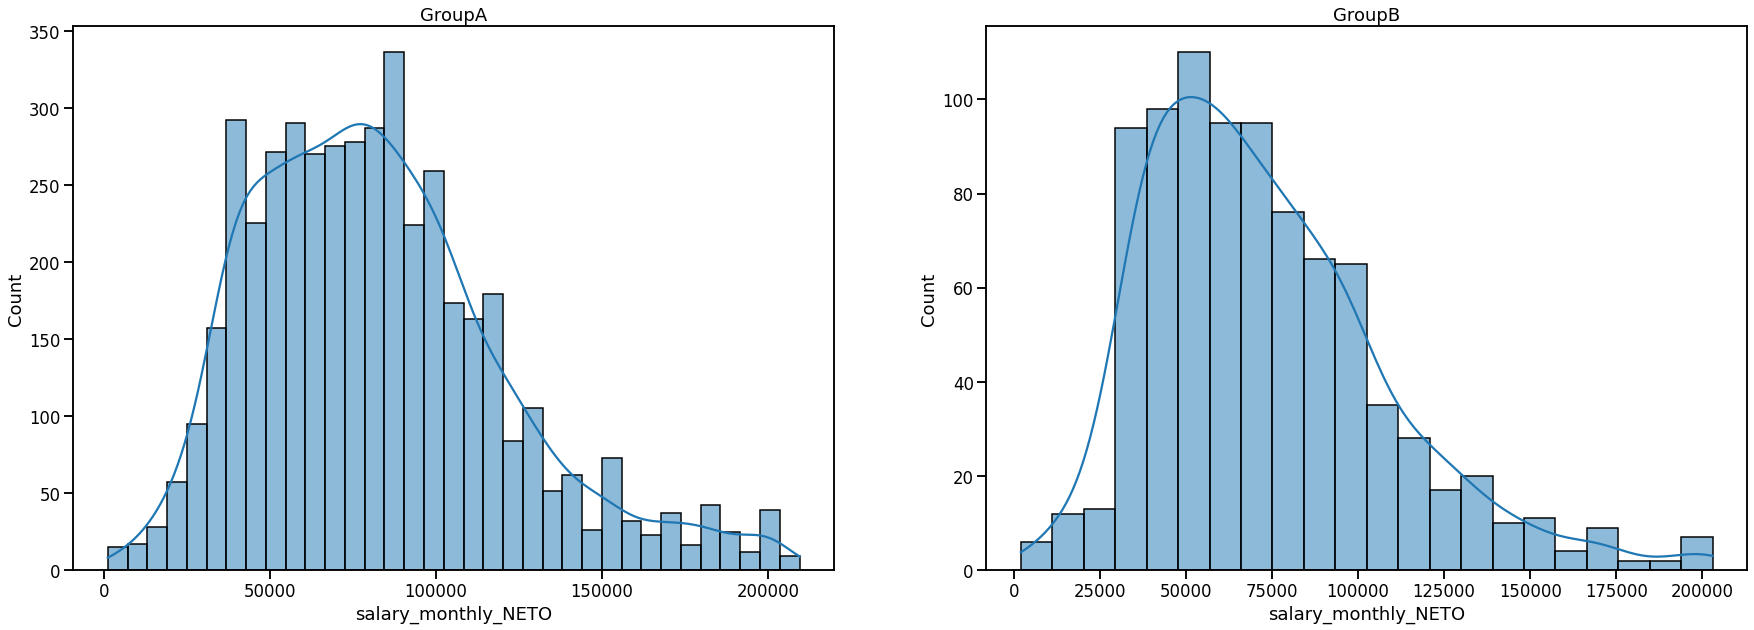

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
sns.histplot(data=groupA,ax=axs[0],kde= True).set_title('GroupA')
sns.histplot(data=groupB,ax=axs[1],kde= True).set_title('GroupB')

#### Como los datos tienen forma normal, usaremos como estimacion puntual, el metodo de los momentos.
#### Sabemos por este metodo que para encontrar un estimador hay que igualar los momentos muestrasles con los correspondientes momentos poblacionales.



### Para estimar $\overline{\mu}$, el metodo da por resultado que: $\overline{\mu}$ = $\mu_1$ - $\mu_2$ 

In [10]:
U1 = groupA.mean() # Mean for mens group
U2 = groupB.mean() # Mean for others group

estimator = U1 - U2
estimator.round()

9549.0

#### De esta estimacion, podemos concluir que el salario promedio de los hombres, con respecto a los demas generos es $9,549 mas alto.

## Intervalo de confianza:

### Como los datos tiene forma normal, y sigma es desconocida.  Usaremos la distribucion t' student.
### Usando la distribucion T, el estadistico es exacto, mientras que si usaramos la distribucio normal, este seria aproximado.

#### No podemos suponer que las varianzas son iguales, por lo tanto debemos usar el metodo de Welch para calcular el intervalo de confianza:

In [11]:
#https://online.stat.psu.edu/stat415/lesson/3/3.2
#https://www.centro-virtual.com/recursos/biblioteca/pdf/estadistica_inferencial/unidad2_pdf3.pdf

from math import sqrt
from scipy.stats import t

#Obtenemos los grados de libertad
var_a = groupA.var()
var_b = groupB.var()
n1 = len(groupA)
n2 = len(groupB)
desv1 = groupA.std()
desv2 = groupB.std()

gl = (var_a / n1 + var_b / n2)**2 / (var_a**2 / (n1**2 * (n1 - 1)) + var_b**2 / (n2**2 * (n2 - 1)))
t = t.ppf(0.975, gl)
print(f"el valor de t es {t}")

resta_medias = U1 - U2 

#Obtenemos el intervalo
ic = t * sqrt(desv1**2/n1 + desv2**2/n2)
cota_inferior = resta_medias - ic
cota_superior = resta_medias + ic



el valor de t es 1.9617656283991454


In [12]:
print(f"el intervalo es [{round(cota_inferior,2)} < {round(estimator,2)} < {round(cota_superior,2)}]")

el intervalo es [6988.72 < 9549.19 < 12109.67]



## Relación entre test de hipótesis e intervalo de confianza.

* Cuando realizamos un test de hipótesis nos sirve para tomar una decisión, si rechazamos o no una hipótesis estadística en base a una muestra. El propósito es en base a los datos tomar una decisión para la investigación.

* Sin embargo, el intervalo de confianza denota un rango dentro del cual podemos encontrar el parámetro a estimar con un determinado nivel de confianza (en este caso, 95%).



## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=$ No hay diferencia entre los valores medios de la distribución de los salarios de los grupos A y B

**Hipótesis Alternativa**

$H_1=$ Hay diferencia entre los valores medios de la distribución de los salarios de los grupos A y B.


**Estadístico (Pivote)**
  * Identificar el estadístico: El estadistico que se esta evaluando es la diferencia de medias
  * Escribir qué distribución tiene bajo $H_0$: Asumimos una distribución Normal

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [22]:
#Calculamos el P-value:
#Usamos equal_var (Equal Variance) en False, para usar el test de Welch.
stats.ttest_ind(groupA, groupB, equal_var = False)

Ttest_indResult(statistic=7.316327500260092, pvalue=4.4127240298079615e-13)

####  Tenemos 2 resultados posibles a la hora de sacar una conclusion con respecto al P-Valor.
Si P-Valor $\le$ $\alpha$, entonces rechazamos $H_0$ al nivel $\alpha$  
Si P-Valor $\ge$ $\alpha$, etonces aceptamos $H_0$ al nivel $\alpha$  

Como tenemos:  
P-Valor = $4.4127240298079615^{-13}$  
$\alpha$ = 0.05  

$4.4127240298079615^{-13}$ $<$ 0.05  


#####  Rechazamos $H_0$!!!   

#### Entonces decimos que si hay diferencia entre los valores medios de los salarios de los dos grupos.

3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?
#### No afecta, ya que al usar el test de Welch no requerimos que los tamaños de las muestras sean similares

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [67]:
from statsmodels.stats.power import tt_ind_solve_power

In [68]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [69]:
# Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.
power = 0.8
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

298.3073379956589

In [70]:
power = 0.9
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

398.7961001403289

In [71]:
power = 0.95
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio

492.8117730249174

#### A medida que se incrementa la potencia del test, es necesario muestras mas grandes.

¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

* En definitiva, el poder estadístico representa la probabilidad de rechazar la hipótesis nula cuando es realmente falsa. Es decir, representa la capacidad de un test para detectar como estadísticamente significativas diferencias o asociaciones de una magnitud determinada.

* Si, nuestra muestra es representativa de la tendencia general dado que, con un poder estadistico de 0.95, 0.90 y 0.80 los tamaños muestrales deberían ser de aproximadamente 493,399 y 298. Nuestra muestra supera amplicamente estos valores por lo que es representativa (tamaño muestral de más de 5000).

* Si bien los datos son generales y podria usarse en juicio como prueba. Habria que considerar el caso de cada empresa en particular

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
